In [1]:
from gnn import GNNTrainer
from movie_lens_loader import MovieLensLoader
from llm import PromptEncoderOnlyClassifier, VanillaEncoderOnlyClassifier

First we load the MovieLensLoader, which downloads the Movie Lens dataset (https://files.grouplens.org/datasets/movielens/ml-latest-small.zip) and prepares it to be used on GNN and LLM (approximatly 30 secs first time)

In [2]:

movie_lens_loader = MovieLensLoader()

Next we initialize the GNNTrainer, which expects the complete dataset to read the dataset schema. The GNNTrainer can later be used to train in link prediction.

In [3]:
gnn_trainer = GNNTrainer(movie_lens_loader.data)

Device: 'cpu'


We then train and validate the model on the link prediction task. If the model is already trained, we can skip this part.

In [4]:
#gnn_trainer.train_model(movie_lens_loader.gnn_train_data, 10)
#gnn_trainer.validate_model(movie_lens_loader.gnn_val_data)

Next we produce the user embedding and movie embedding for every edge in the dataset. These embeddings can then be used for the LLM on the link-prediction task. Can be skipped if this was already done ones.

In [5]:
llm_df = gnn_trainer.get_embeddings(movie_lens_loader)


Next we initialize the vanilla encoder only classifier. This classifier does only use the NLP part of the prompt (no graph embeddings) for predicting if the given link exists.

In [6]:
vanilla_encoder_only_classifier = VanillaEncoderOnlyClassifier(movie_lens_loader.llm_df)

Next we generate a vanilla llm dataset and tokenize it for training.

In [7]:
dataset_vanilla = movie_lens_loader.generate_vanilla_dataset(vanilla_encoder_only_classifier.tokenize_function)

Next we train the model on the produced dataset. This can be skipped, if already trained ones.

In [8]:
#vanilla_encoder_only_classifier.train_model_on_data(dataset_vanilla, epochs=3)

Next we initialize the prompt encoder only classifier. This classifier uses the vanilla prompt and the graph embeddings for its link prediction.

In [9]:
prompt_encoder_only_classifier = PromptEncoderOnlyClassifier(movie_lens_loader, gnn_trainer.get_embedding, force_recompute=True)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-2_H-128_A-2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


We also generate a prompt dataset, this time the prompts also include 2d embeddings of user and movie

In [10]:
dataset_prompt = movie_lens_loader.generate_prompt_embedding_dataset(prompt_encoder_only_classifier.tokenize_function)

Map:   0%|          | 0/56469 [00:00<?, ? examples/s]

Map:   0%|          | 0/17142 [00:00<?, ? examples/s]

Map:   0%|          | 0/17142 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/56469 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/17142 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/17142 [00:00<?, ? examples/s]

We also train the model. This can be skipped if already done ones.

In [11]:
prompt_encoder_only_classifier.train_model_on_data(dataset_prompt, epochs = 3)

  0%|          | 0/2649 [00:00<?, ?it/s]

AttributeError: 'list' object has no attribute 'detach'

In [ ]:
prompt_encoder_only_classifier.plot_confusion_matrix(dataset=dataset_prompt)

In [ ]:
vanilla_encoder_only_classifier.plot_confusion_matrix(dataset=dataset_vanilla)

In [ ]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizer
import pandas as pd
import numpy as np

In [ ]:
dataset_prompt["train"][0]["prompt"]

"user: 0, title: Toy Story (1995), genres: ['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy'] user embedding: [0.1256062239408493, -0.6114063262939453, -0.6405051946640015, 0.11815494298934937, -0.4106871485710144, -0.3222436010837555, 0.23343513906002045, 0.05675528943538666, -0.3446347117424011, 0.14372286200523376, -0.20900948345661163, 0.2844635248184204, 0.0933184027671814, -0.2583918571472168, -0.33378684520721436, -0.32362300157546997, 0.031117647886276245, -0.12867805361747742, 0.011190103366971016, -0.16179312765598297, 0.1316142976284027, 0.21360446512699127, -0.02377358451485634, -0.097269207239151, -0.2176513820886612, 0.2655571699142456, 0.264049232006073, 0.5510265231132507, 0.06921333074569702, -0.05549090355634689, 0.12344062328338623, 0.011704280972480774, 0.12220481038093567, -0.721782386302948, 0.3540976643562317, 0.09414444118738174, -0.04580990970134735, -0.020103320479393005, 0.3931364119052887, 0.06444166600704193, -0.10645268857479095, 0.487267673015594

In [ ]:
prompt_negative_sample = movie_lens_loader.sample_prompt_datapoint(existing=False, get_embedding_cb=gnn_trainer.get_embedding, tokenize_function=prompt_encoder_only_classifier.tokenize_function)
prompt_positive_sample = movie_lens_loader.sample_prompt_datapoint(tokenize_function=prompt_encoder_only_classifier.tokenize_function)
vanilla_negative_sample = movie_lens_loader.sample_vanilla_datapoint(existing=False, tokenize_function=vanilla_encoder_only_classifier.tokenize_function)
vanilla_positive_sample = movie_lens_loader.sample_vanilla_datapoint(tokenize_function=vanilla_encoder_only_classifier.tokenize_function)

In [ ]:
prompt_negative_sample

{'input_ids': tensor([[  101,  5310,  1024, 20666,  1010,  2516,  1024,  2919,  3337,  1006,
           2786,  1007,  1010, 11541,  1024,  1031,  1005,  2895,  1005,  1010,
           1005,  4038,  1005,  1010,  1005,  4126,  1005,  1010,  1005,  3689,
           1005,  1010,  1005, 10874,  1005,  1033,  5310,  7861,  8270,  4667,
           1024,  1031,  1014,  1012, 22288,  2683,  2683, 26976, 19961, 25746,
          14142,  2581, 17134,  1010,  1011,  1014,  1012,  5840,  2683,  2683,
          17465,  2581, 21619, 12521, 14526,  2581,  2581,  2575,  2581,  1010,
           1011,  1014,  1012,  6486, 18827, 23833,  2620, 18139, 23632, 16068,
          16086,  2487,  1010,  1014,  1012,  5179,  2683,  2575,  2581, 22932,
           2683, 15136,  2620, 21926, 18827,  2475,  1010,  1011,  1014,  1012,
           3381, 21472,  2575,  2620,  2581, 21486,  2575,  2620,  2683, 19961,
           2509,  1010,  1011,  1014,  1012, 11118, 19961, 24594,  2692,  2581,
          16703, 22025, 244

In [ ]:
tokenizer = BertTokenizer.from_pretrained("google/bert_uncased_L-2_H-128_A-2", model_max_length=256)

In [ ]:
test = "user: 0, title: Toy Story (1995), genres: ['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy'],[0.09566975384950638, 0.1871771365404129]"

# Current State
Here I want to plot the attentions not only between single tokens but between the embedding part and non-embedding part.

['[CLS]', 'user', ':', '232', ',', 'title', ':', 'bad', 'boys', '(', '1995', ')', ',', 'genres', ':', '[', "'", 'action', "'", ',', "'", 'comedy', "'", ',', "'", 'crime', "'", ',', "'", 'drama', "'", ',', "'", 'thriller', "'", ']', 'user', 'em', '##bed', '##ding', ':', '[', '0', '.', '490', '##9', '##9', '##56', '##45', '##52', '##30', '##7', '##13', ',', '-', '0', '.', '04', '##9', '##9', '##21', '##7', '##36', '##12', '##11', '##7', '##7', '##6', '##7', ',', '-', '0', '.', '89', '##24', '##26', '##8', '##48', '##41', '##15', '##60', '##1', ',', '0', '.', '56', '##9', '##6', '##7', '##44', '##9', '##18', '##8', '##23', '##24', '##2', ',', '-', '0', '.', '1973', '##46', '##6', '##8', '##7', '##31', '##6', '##8', '##9', '##45', '##3', ',', '-', '0', '.', '111', '##45', '##29', '##0', '##7', '##32', '##38', '##37', '##28', ',', '0', '.', '267', '##9', '##30', '##32', '##8', '##8', '##45', '##9', '##7', '##7', '##8', ',', '0', '.', '500', '##34', '##28', '##45', '##9', '##16', '##7', '##4

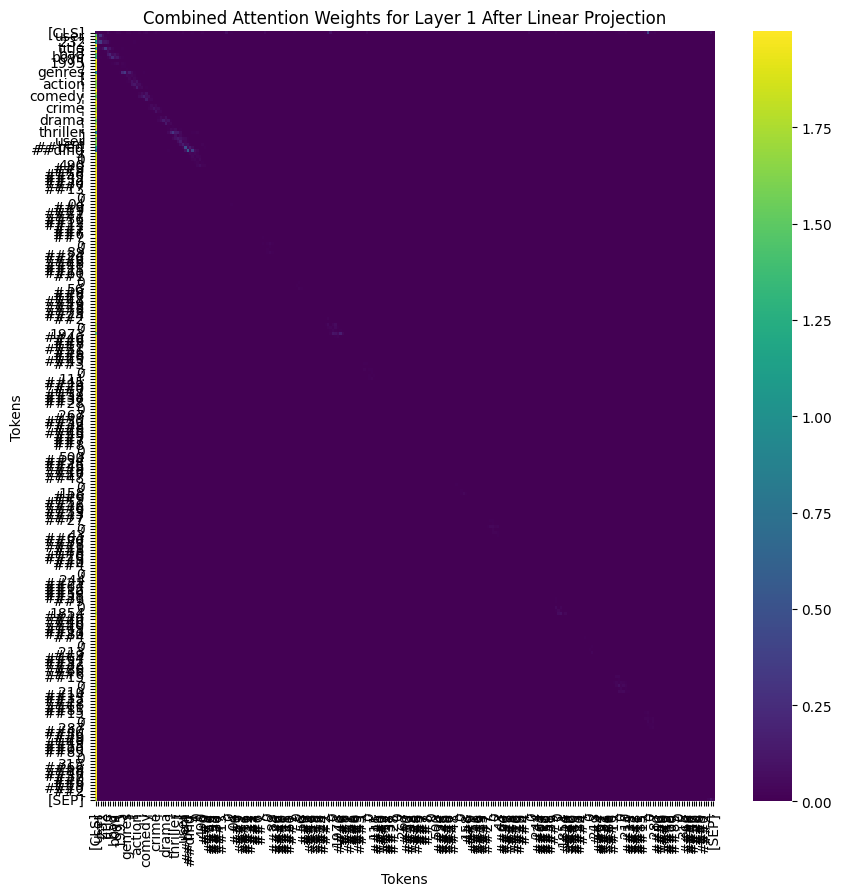

In [ ]:
def find_sub_list(sl,l):
    sll=len(sl)
    for ind in (i for i,e in enumerate(l) if e==sl[0]):
        if l[ind:ind+sll]==sl:
            return ind

def foo(self: PromptEncoderOnlyClassifier, sample: dict, layer = -1):
    self.model.eval()
    with torch.no_grad():
        outputs = self.model(input_ids = sample["input_ids"], attention_mask = sample["attention_mask"], output_attentions=True)
        attentions = outputs.attentions  # This will contain the attention weights for each layer and head
    combined_attention = torch.sum(attentions[layer], dim=1).squeeze().detach().numpy()
    # Tokenize the text to get the token labels
    tokens = self.tokenizer.convert_ids_to_tokens(sample['input_ids'][0])
    print(tokens)
    starting_index_user_embeddings = find_sub_list(['user', 'em', '##bed', '##ding'], tokens)
    starting_index_movie_embeddings = find_sub_list(['user', 'em', '##bed', '##ding'], tokens)
    print

    # Plot the combined attention weights
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(combined_attention, xticklabels=tokens, yticklabels=tokens, cmap='viridis', ax=ax)
    plt.title('Combined Attention Weights for Layer 1 After Linear Projection')
    plt.xlabel('Tokens')
    plt.ylabel('Tokens')
    plt.show()
foo(prompt_encoder_only_classifier, prompt_negative_sample)